# Hot Jupiters

[Hot Jupiters](https://en.wikipedia.org/wiki/Hot_Jupiter) are a rare and peculiar class of exoplanet that have masses comparable to that of Jupiter and short orbital periods of typically four to five days. There are several theories that explain how such objects form and migrate as discussed in this [Nature article](http://www.nature.com/nature/journal/v537/n7621/full/nature19430.html).

In this notebook, we will attempt to confirm the most common properties we know so far about Hot Jupiters.

1. There is an excess of objects that have orbital periods shorter than about 10 days and masses similar to that of Jupiter.
2. The objects rarely have companion planets on nearby orbits.
3. Nearly one-third of hot Jupiters have orbital paths that are inclined with respect to their star's equator, and several planets in the population rotate in the opposite direction to the star.

It is assumed that you are already familiar with the [NASA Exoplanet Archive](http://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html) that provides a table of [confirmed exoplanet data](http://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets). If not, we encourage you to check a dedicated `Exoplanet plots` tutorial for basic querying and plotting.

Let's begin by importing necessary libraries and fetching the data.

In [2]:
from datetime import datetime as dt

print('Last accessed on: {}'.format(dt.now()))

Last accessed on: 2016-12-18 20:07:11.730000


In [3]:
#for Pyton 2.7
import urllib2
import time 

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
response = urllib2.urlopen(url)
html = response.read()

outpath = 'confirmed_planets_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

print("retrieving URL: {}".format(url))

with open(outpath,'wb') as f:
     f.write(html)
print("created file: {}".format(outpath))

retrieving URL: http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets
created file: confirmed_planets_20161218.csv


Load the downloaded .csv file as [pandas dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [4]:
import pandas as pd
df = pd.read_csv(outpath)
df.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,...,st_massblend,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,st_radn,pl_nnotes,rowupdate
0,HAT-P-3,b,Transit,1,2.899736,0.000002,-0.000002,0.0,6,0.03866,...,0.0,4,0.80,0.04,-0.04,0.0,0.0,5,0,2014-05-14
1,HAT-P-5,b,Transit,1,2.788491,0.000025,-0.000025,0.0,2,0.04075,...,0.0,2,1.17,0.05,-0.05,0.0,0.0,2,0,2014-05-14
2,HAT-P-6,b,Transit,1,3.852985,0.000005,-0.000005,0.0,3,0.05235,...,0.0,5,1.46,0.06,-0.06,0.0,0.0,4,0,2014-05-14


You can look up the meaning of each columns [here](http://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html).

In [5]:
df.shape

(3414, 80)

There are more than 3000 rows, each corresponding to an entry for a confirmed exoplanet.

Also, let's define the constants that will be useful later.

In [8]:
#mass, semi-major axis, radius, period for Earth
M_E = 5.972e24 #kg
a_E = 149.60e6 #m 
R_E = 6371e3 #km
P_E = 365 #d
#for Jupiter
M_J = 1.898e27 #kg
a_J = 778.57e6 #m
R_J = 69911e3 #m
P_J = 11.86*P_E

# 1. There is an excess of objects that have orbital periods shorter than about 10 days and masses similar to that of Jupiter

Here, we will loosely define the mass ($M [M_{Jup}]$) and semi-major axis ($a [R_{Jup}]$) of a Hot Jupiter as:
$$0.36 \leq M \leq 11.8$$
$$0.015 \leq a \leq 0.1$$
Note that we extend the upper bound for $a$ which is $\leq 0.05$ AU in wikipedia up to 0.1 AU.

## Planet Mass-Orbital radius plot

First we plot all the known exoplanets and in pale red and overplot the Hot Jupiters in blue. We also indicate the positions of Jupiter and Earth for comparison.

Populating the interactive namespace from numpy and matplotlib


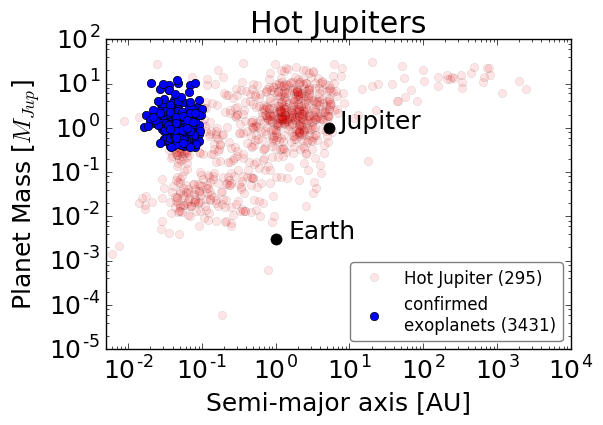

In [15]:
from matplotlib import pylab as pl
%pylab inline
matplotlib.rcParams.update({'font.size': 18})

#plot all
pl.plot(df['pl_orbsmax'],df['pl_bmassj'],'ro', alpha=0.1)
#plot Hot Jupiter
pl.plot(df_hot_jup['pl_orbsmax'],df_hot_jup['pl_bmassj'],'bo')
pl.xlabel('Semi-major axis [AU]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
pl.xlim([5e-3, 1e4])
pl.title('Hot Jupiters')
#scale in log to avoid over-crowding
pl.xscale('log')
pl.yscale('log')
#indicate E and J
pl.plot(a_E/a_E,M_E/M_J,'ko', markersize=8, label='Earth')
pl.text(a_E/a_E+0.5,M_E/M_J,'Earth')
pl.plot(a_J/a_E,M_J/M_J,'ko', markersize=8, label='Jupiter')
pl.text(a_J/a_E+2,M_J/M_J,'Jupiter')
#pl.plot(a_N/a_E,M_N/M_J,'k^', markersize=15, label='Neptune')
label1=str('Hot Jupiter ({})'.format(len(df_hot_jup)))
label2=str('confirmed \nexoplanets ({})'.format(len(df)))
leg = pl.legend([label1,label2], fancybox=True, loc=4, numpoints = 1, fontsize=12)
leg.get_frame().set_alpha(0.5)
pl.show()

## Planet Period-Orbital radius plot

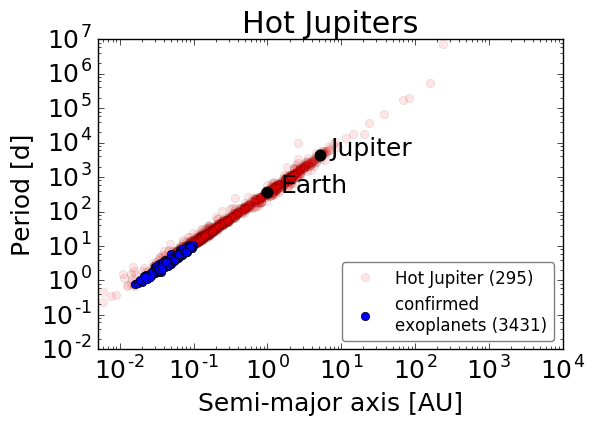

In [21]:
#plot all
pl.plot(df['pl_orbsmax'],df['pl_orbper'],'ro', alpha=0.1)
#plot Hot Jupiter
pl.plot(df_hot_jup['pl_orbsmax'],df_hot_jup['pl_orbper'],'bo')

pl.xlabel('Semi-major axis [AU]')
pl.ylabel('Period [d]')
pl.xlim([5e-3, 1e4])
pl.title('Hot Jupiters')

#indicate E and J
pl.plot(a_E/a_E,P_E,'ko', markersize=8, label='Earth')
pl.text(a_E/a_E+0.5,P_E,'Earth')
pl.plot(a_J/a_E,P_J,'ko', markersize=8, label='Jupiter')
pl.text(a_J/a_E+2,P_J,'Jupiter')
#scale in log to avoid over-crowding
pl.xscale('log')
pl.yscale('log')

label1=str('Hot Jupiter ({})'.format(len(df_hot_jup)))
label2=str('confirmed \nexoplanets ({})'.format(len(df)))
leg = pl.legend([label1,label2], fancybox=True, loc=4, numpoints = 1, fontsize=12)
leg.get_frame().set_alpha(0.5)
pl.show()

# 2. The objects rarely have companion planets on nearby orbits

Here we will consider Hot Jupiters in multi-planet systems. We start by filtering in our list stars with at least two planets. 

In [27]:
df2 = df[df['pl_pnum'] == 2] #have 2 planets
df3 = df[df['pl_pnum'] == 3] #3 and so on
df4 = df[df['pl_pnum'] == 4]
df5 = df[df['pl_pnum'] == 5]
df6 = df[df['pl_pnum'] == 6]
df7 = df[df['pl_pnum'] == 7] #up to seven planets only

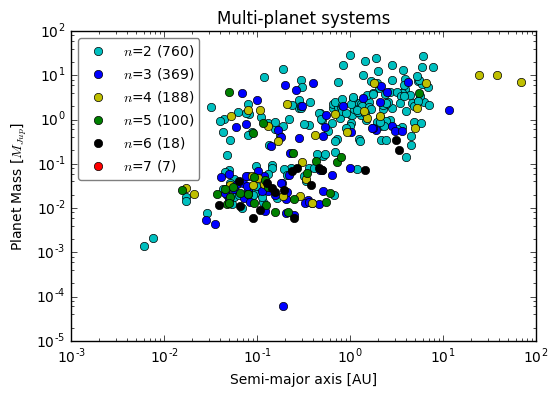

In [50]:
#plot each group
pl.plot(df2['pl_orbsmax'], df2['pl_bmassj'], 'co', label='$n$=2 ({})'.format(np.count_nonzero(df['pl_pnum']==2)))
pl.plot(df3['pl_orbsmax'], df3['pl_bmassj'], 'bo', label='$n$=3 ({})'.format(np.count_nonzero(df['pl_pnum']==3)))
pl.plot(df4['pl_orbsmax'], df4['pl_bmassj'], 'yo', label='$n$=4 ({})'.format(np.count_nonzero(df['pl_pnum']==4)))
pl.plot(df5['pl_orbsmax'], df5['pl_bmassj'], 'go', label='$n$=5 ({})'.format(np.count_nonzero(df['pl_pnum']==5)))
pl.plot(df6['pl_orbsmax'], df6['pl_bmassj'], 'ko', label='$n$=6 ({})'.format(np.count_nonzero(df['pl_pnum']==6)))
pl.plot(df7['pl_orbsmax'], df7['pl_bmassj'], 'ro', label='$n$=7 ({})'.format(np.count_nonzero(df['pl_pnum']==7)))

pl.title('Multi-planet systems')
pl.xlabel('Semi-major axis [AU]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
pl.xscale('log')
pl.yscale('log')
#pl.plot(a_E/a_E,M_E/M_J,'ko', markersize=8, label='Earth')
#pl.text(a_E/a_E+0.5,M_E/M_J,'Earth')
#pl.plot(a_J/a_E,M_J/M_J,'ko', markersize=8, label='Jupiter')
#pl.text(a_J/a_E+2,M_J/M_J,'Jupiter')
#pl.legend(loc=4, numpoints = 1, fontsize=10)

leg = pl.legend(fancybox=True, loc='best', numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

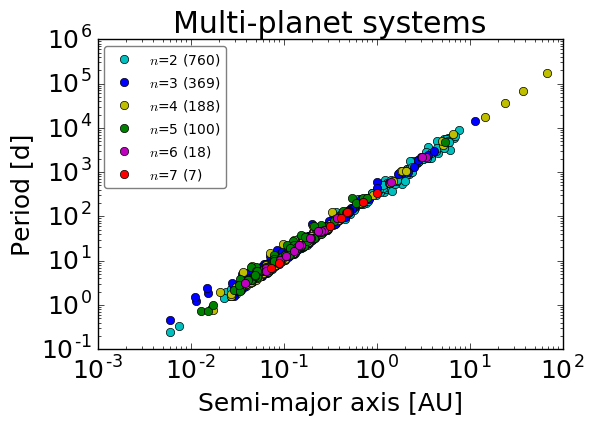

In [44]:
#plot each group
pl.plot(df2['pl_orbsmax'], df2['pl_orbper'], 'co', label='$n$=2 ({})'.format(np.count_nonzero(df['pl_pnum']==2)))
pl.plot(df3['pl_orbsmax'], df3['pl_orbper'], 'bo', label='$n$=3 ({})'.format(np.count_nonzero(df['pl_pnum']==3)))
pl.plot(df4['pl_orbsmax'], df4['pl_orbper'], 'yo', label='$n$=4 ({})'.format(np.count_nonzero(df['pl_pnum']==4)))
pl.plot(df5['pl_orbsmax'], df5['pl_orbper'], 'go', label='$n$=5 ({})'.format(np.count_nonzero(df['pl_pnum']==5)))
pl.plot(df6['pl_orbsmax'], df6['pl_orbper'], 'mo', label='$n$=6 ({})'.format(np.count_nonzero(df['pl_pnum']==6)))
pl.plot(df7['pl_orbsmax'], df7['pl_orbper'], 'ro', label='$n$=7 ({})'.format(np.count_nonzero(df['pl_pnum']==7)))

pl.title('Multi-planet systems')
pl.xlabel('Semi-major axis [AU]')
pl.ylabel('Period [d]')
pl.xscale('log')
pl.yscale('log')
#pl.plot(a_E/a_E,P_E,'ko', markersize=8, label='Earth')
#pl.text(a_E/a_E+0.5,P_E,'Earth')
#pl.plot(a_J/a_E,P_J,'ko', markersize=8, label='Jupiter')
#pl.text(a_J/a_E+2,P_J,'Jupiter')
#pl.legend(loc=4, numpoints = 1, fontsize=10)

leg = pl.legend(fancybox=True, loc='best', numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

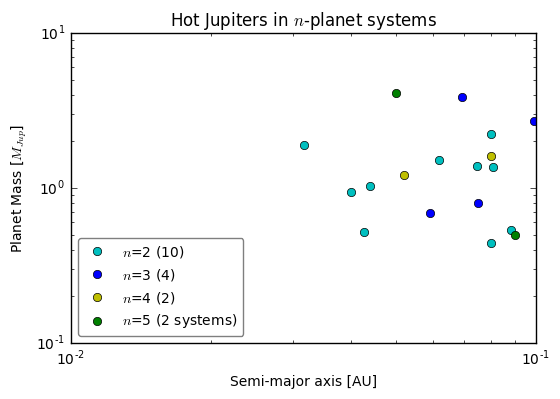

In [47]:
#make new dataframes
HJ2 = df_hot_jup[df_hot_jup['pl_pnum'] == 2]
HJ3 = df_hot_jup[df_hot_jup['pl_pnum'] == 3]
HJ4 = df_hot_jup[df_hot_jup['pl_pnum'] == 4]
HJ5 = df_hot_jup[df_hot_jup['pl_pnum'] == 5]
HJ6 = df_hot_jup[df_hot_jup['pl_pnum'] == 6]
HJ7 = df_hot_jup[df_hot_jup['pl_pnum'] == 7]

#plot each HJ
pl.plot(HJ2['pl_orbsmax'], HJ2['pl_bmassj'], 'co', label='$n$=2 ({})'.format(np.count_nonzero(df_hot_jup['pl_pnum']==2)))
pl.plot(HJ3['pl_orbsmax'], HJ3['pl_bmassj'], 'bo', label='$n$=3 ({})'.format(np.count_nonzero(df_hot_jup['pl_pnum']==3)))
pl.plot(HJ4['pl_orbsmax'], HJ4['pl_bmassj'], 'yo', label='$n$=4 ({})'.format(np.count_nonzero(df_hot_jup['pl_pnum']==4)))
pl.plot(HJ5['pl_orbsmax'], HJ5['pl_bmassj'], 'go', label='$n$=5 ({} systems)'.format(np.count_nonzero(df_hot_jup['pl_pnum']==5)))

pl.title('Hot Jupiters in $n$-planet systems')
pl.xlabel('Semi-major axis [AU]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
pl.xscale('log')
pl.yscale('log')
#pl.plot(a_E/a_E,M_E/M_J,'ko', markersize=8, label='Earth')
#pl.text(a_E/a_E+0.5,M_E/M_J,'Earth')
#pl.plot(a_J/a_E,M_J/M_J,'ko', markersize=8, label='Jupiter')
#pl.text(a_J/a_E+2,M_J/M_J,'Jupiter')
#pl.legend(loc=4, numpoints = 1, fontsize=10)
leg = pl.legend(fancybox=True, loc=3, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

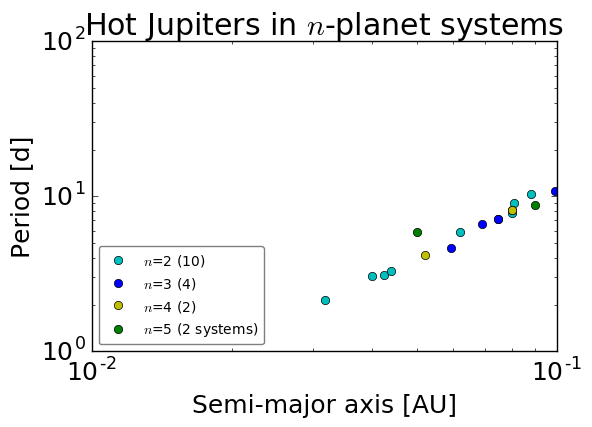

In [45]:
#plot each HJ
pl.plot(HJ2['pl_orbsmax'], HJ2['pl_orbper'], 'co', label='$n$=2 ({})'.format(np.count_nonzero(df_hot_jup['pl_pnum']==2)))
pl.plot(HJ3['pl_orbsmax'], HJ3['pl_orbper'], 'bo', label='$n$=3 ({})'.format(np.count_nonzero(df_hot_jup['pl_pnum']==3)))
pl.plot(HJ4['pl_orbsmax'], HJ4['pl_orbper'], 'yo', label='$n$=4 ({})'.format(np.count_nonzero(df_hot_jup['pl_pnum']==4)))
pl.plot(HJ5['pl_orbsmax'], HJ5['pl_orbper'], 'go', label='$n$=5 ({} systems)'.format(np.count_nonzero(df_hot_jup['pl_pnum']==5)))

pl.title('Hot Jupiters in $n$-planet systems')
pl.xlabel('Semi-major axis [AU]')
pl.ylabel('Period [d]')
pl.xscale('log')
pl.yscale('log')
leg = pl.legend(fancybox=True, loc=3, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

# 3. Nearly one-third of hot Jupiters have orbital paths that are inclined with respect to their star's equator, and several planets in the population rotate in the opposite direction to the star

The first point is concerned with orbital inclination of Hot Jupiters and the second is their direction of revolution with respect to the rotation of the star. If this motions are opposite in direction, it is called retrograde motion. Otherwise, it is called prograde motion and this is true for the solar system (i.e. perceived "normal").

## Inclination of HJ

Let's see how many HJ have inclination, $i > 45^{\circ}$. Note that solar system planets are inclined at most 7$^{\circ}$ (in the case of Mercury) relative to the ecliptic (or Earth's orbital plane).

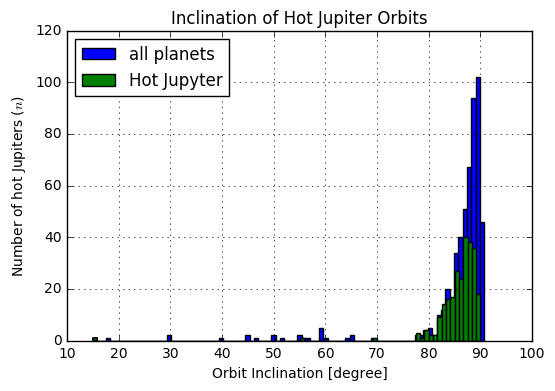

In [86]:
df['pl_orbincl'].hist(bins=90, color='b', label='all planets')
df_hot_jup['pl_orbincl'].hist(bins=90, color='g', label='Hot Jupyter')
pl.xlabel('Orbit Inclination [degree]')
pl.ylabel('Number of hot Jupiters ($n$)')
pl.title('Inclination of Hot Jupiter Orbits')
pl.legend(loc='best')

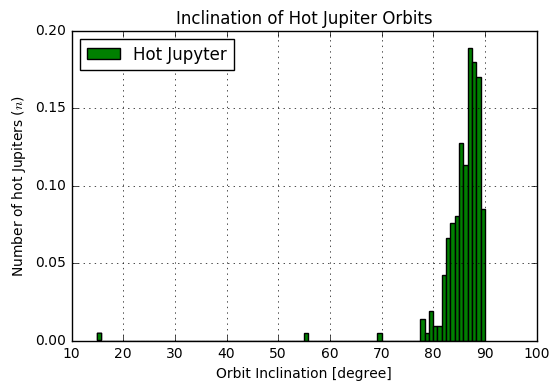

In [87]:
#normalized histogram
df_hot_jup['pl_orbincl'].hist(bins=90, normed=True, color='g', label='Hot Jupyter')
pl.xlabel('Orbit Inclination [degree]')
pl.ylabel('Number of hot Jupiters ($n$)')
pl.title('Inclination of Hot Jupiter Orbits')
pl.legend(loc='best')

## Retrograde HJ

HAT-P-7 is most likely the first result is you do a google search for "retrograde exoplanet". Let's check if this system has a hot Jupyter.

In [36]:
df_hot_jup.query('pl_hostname == "HAT-P-7"')

,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,...,st_massblend,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,st_radn,pl_nnotes,rowupdate
120,HAT-P-7,b,Transit,1,2.204737,0.000001,-0.000001,0.0,7,0.03676,...,0.0,8,1.84,0.17,-0.17,0.0,0.0,8,1,2016-08-18


Indeed, it has one HJ.

How about systems with 2 hot Jupiters with inclined orbits?

Therefore, (not taking into account detection bias) we have seen that hot Jupyters are mostly inclined and there are some that are also prograde. 

Before we finish, it's worth checking the mass-radius relation of HJ and compare the result for planets grouped via their detection method.

## Mass-radius relation of hot Jupiters

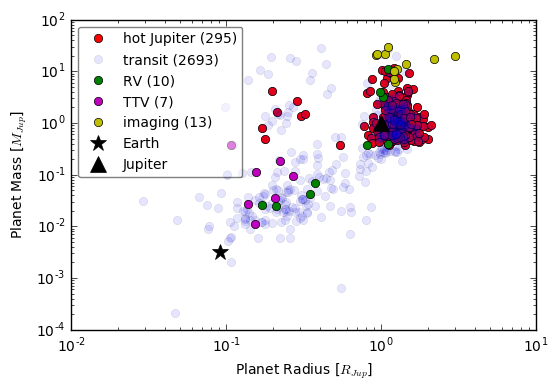

In [92]:
pl.plot(df_hot_jup['pl_radj'],df_hot_jup['pl_bmassj'],'ro', label='hot Jupiter ({})'.format(len(df_hot_jup)))
pl.plot(df_transit['pl_radj'],df_transit['pl_bmassj'],'bo', alpha=0.1, label='transit ({})'.format(np.count_nonzero(df_transit['pl_radj']>0)))
pl.plot(df_RV['pl_radj'],df_RV['pl_bmassj'],'go', label='RV ({})'.format(np.count_nonzero(df_RV['pl_radj']>0)))
pl.plot(df_TTV['pl_radj'],df_TTV['pl_bmassj'],'mo', label='TTV ({})'.format(np.count_nonzero(df_TTV['pl_radj']>0)))
pl.plot(df_DI['pl_radj'],df_DI['pl_bmassj'],'yo', label='imaging ({})'.format(np.count_nonzero(df_DI['pl_radj']>0)))
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
#pl.xlim([5e-3, 1e5])
pl.xscale('log')
pl.yscale('log')
pl.plot(R_E/R_J,M_E/M_J,'k*', markersize=12, label='Earth')
pl.plot(1,1,'k^', markersize=12, label='Jupiter')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

As mentioned above, there is extreme overlap in the region/parameter space occupied by hot Jupiters (red) and other confirmed exoplanets (blue).  

# General properties of hot Jupiters
## Validate the following.

Their defining characteristics are their large masses and short orbital periods, spanning 0.36–11.8 Jupiter masses and 1.3–111 Earth days.[8] The mass cannot be greater than approximately 13.6 Jupiter masses because then the planet would start burning deuterium and become a brown dwarf.[9]


Most have nearly circular orbits (low eccentricities). It is thought that their orbits are circularized by perturbations from nearby stars or tidal forces.[10]
Many have unusually low densities. The lowest one measured thus far is that of TrES-4 at 0.222 g/cm3.[11] The large radii of hot Jupiters are not yet fully understood but it is thought that the expanded envelopes can be attributed to high stellar irradiation, high atmospheric opacities, possible internal energy sources, and orbits close enough to their stars for the outer layers of the planets to exceed their Roche limit and be pulled further outward.[11][12]


They are likely to have extreme and exotic atmospheres due to their short periods, relatively long days, and tidal locking. Atmospheric dynamics models predict strong vertical stratification with intense winds and super-rotating equatorial jets driven by radiative forcing and the transfer of heat and momentum.[13][14] The day-night temperature difference at the photosphere is predicted to be substantial, approximately 500 K for a model based on HD 209458b.[14]


They appear to be more common around F- and G-type stars and less so around K-type stars. Hot Jupiters around red dwarfs are very rare.[15] Generalizations about the distribution of these planets must take into account the various observational biases.


In-situ formation
It is also theorized that a substantial fraction of hot Jupiters may have formed in-situ via the core accretion method of planetary formation.[22] This theory is particularly attractive because it has measurable consequences including the expectation that hot Jupiters should frequently be accompanied by additional low-mass planets with periods shorter than ~100 days. Traditionally, this mode of conglomeration has been disfavored due to the fact that there may not be enough solid material orbiting close to the star to allow for the in situ assembly of massive cores, which are necessary for the formation of hot Jupiters.[23][24] Recent surveys, however, have found that the inner regions of planetary systems are not empty, and are frequently occupied by super-Earth type planets.[25][26] Yet, direct calculations indicate that in situ formation of super-Earths in the close proximity of a solar-mass star require surface densities of solids ≈ 104 g/cm2, or larger.[27]


Terrestrial planets in systems with hot Jupiters
Simulations have shown that the migration of a Jupiter-sized planet through the inner protoplanetary disk (the region between 5 and 0.1 AU from the star) is not as destructive as one might assume. More than 60% of the solid disk materials in that region are scattered outward, including planetesimals and protoplanets, allowing the planet-forming disk to reform in the gas giant's wake.[28] In the simulation, planets up to two Earth masses were able to form in the habitable zone after the hot Jupiter passed through and its orbit stabilized at 0.1 AU. Due to the mixing of inner-planetary-system material with outer-planetary-system material from beyond the frost line, simulations indicated that the terrestrial planets that formed after a hot Jupiter's passage would be particularly water-rich.[28]


It has been found that several hot Jupiters have retrograde orbits and this calls into question the theories about the formation of planetary systems,[31] although rather than a planet's orbit having been disturbed, it may be that the star itself flipped over early in their system's formation due to interactions between the star's magnetic field and the planet-forming disc.[32] By combining new observations with the old data it was found that more than half of all the hot Jupiters studied have orbits that are misaligned with the rotation axis of their parent stars, and six exoplanets in this study have retrograde motion.


Recent research has found that several hot Jupiters are in misaligned systems.[33][34] This misalignment may be related to the heat of the photosphere the hot Jupiter is orbiting. There are many proposed theories as to why this might occur. One such theory involves tidal dissipation and suggests there is a single mechanism for producing hot Jupiters and this mechanism yields a range of obliquities. Cooler stars with higher tidal dissipation damps the obliquity (explaining why hot Jupiters orbiting cooler stars are well aligned) while hotter stars do not damp the obliquity (explaining the observed misalignment).[8]


Ultra-short-period Jupiters
Ultra-short-period Jupiters are a class of hot Jupiters with orbital periods below 1 day and occur only around stars of less than about 1.25 solar masses.[35]


Five ultra-short-period planet candidates have been identified in the region of the Milky Way known as the galactic bulge. Confirmed transiting hot Jupiters that have orbital periods of less than one day include WASP-18b, WASP-19b, WASP-43b and WASP-103b.[36]


Puffy planets
Gas giants with a large radius and very low density are sometimes called "puffy planets"[37] or "hot Saturns", due to their density being similar to Saturn's. Puffy planets orbit close to their stars so that the intense heat from the star combined with internal heating within the planet will help inflate the atmosphere. Six large-radius low-density planets have been detected by the transit method. In order of discovery they are: HAT-P-1b,[38][39] COROT-1b, TrES-4, WASP-12b, WASP-17b, and Kepler-7b. Some hot Jupiters detected by the radial-velocity method may be puffy planets. Most of these planets are below two Jupiter masses as more massive planets have stronger gravity keeping them at roughly Jupiter's size.
Hot Jupiters around red giants
It has been proposed that, even though no planet of this type has been found until now, gas giants orbiting red giants at distances similar to that of Jupiter could be hot Jupiters due to the intense irradiation they would receive from their stars. It is very likely that in the Solar System Jupiter will become a hot Jupiter after the transformation of the Sun into a red giant.[43]


Hot Jupiters orbiting red giants would differ from those orbiting main-sequence stars in a number of ways, most notably the possibility of accreting material from the stellar winds of their stars and, assuming a fast rotation (not tidally locked to their stars), a much more evenly distributed heat with many narrow-banded jets. Their detection using the transit method would be much more difficult due to their tiny size compared to the stars they orbit, as well as the long time needed (months or even years) for one to transit their star as well as to be occulted by it.


It has been shown that approximately 50% of hot Jupiters have distant Jupiter-mass or larger companions.[20]

"If we want to know how many potentially habitable Earth-like planets are there, having one hot Jupiter rampaging their way though the inner part of the planetary system, and it could toss out your habitable earth and put it into either a much closer orbit or a much further orbit. So knowing how things have moved around will tell you a lot about where you might find interesting planets.” -Kate Knudson

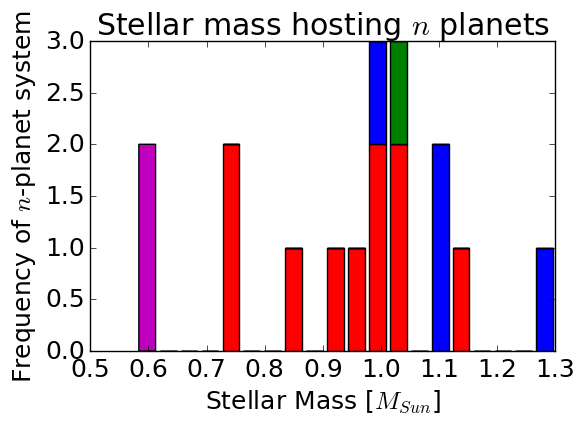

In [40]:
colors = ['r','b','g','m']
labels = ['$n$=2','$n$=3','$n$=4','$n$=5']
pl.hist([HJ2['st_mass'],HJ3['st_mass'],HJ4['st_mass'],HJ5['st_mass']], bins=20, color=colors, stacked=True, label=labels)
pl.xlabel('Stellar Mass [$M_{Sun}$]')
pl.ylabel('Frequency of $n$-planet system')
pl.title('Stellar mass hosting $n$ planets')
#pl.legend()

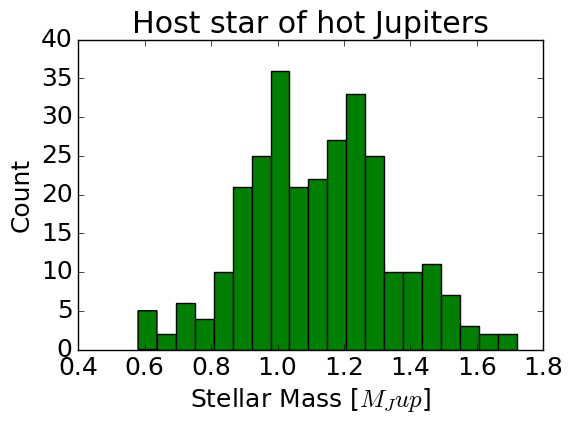

In [41]:
colors = ['r','b','g','m']
labels = ['$n$=2','$n$=3','$n$=4','$n$=5']
#pl.hist([HJ2['st_mass'],HJ3['st_mass'],HJ4['st_mass'],HJ5['st_mass']], bins=20, color=colors, stacked=True, label=labels)
pl.hist(df_hot_jup['st_mass'], bins=20, color='g')
pl.xlabel('Stellar Mass [$M_Jup$]')
pl.ylabel('Count')
pl.title('Host star of hot Jupiters')

In [6]:
#df_hot_jup['st_age'].fillna(None, inplace=False)

In [ ]:
colors = ['r','b','g','m']
labels = ['$n$=2','$n$=3','$n$=4','$n$=5']
#pl.hist([HJ2['st_mass'],HJ3['st_mass'],HJ4['st_mass'],HJ5['st_mass']], bins=20, color=colors, stacked=True, label=labels)
pl.hist(df_hot_jup['st_age'], bins=20, color='g')
pl.xlabel('Stellar Age [Gyr]')
pl.ylabel('Count')
pl.title('Host star of hot Jupiters')

The discovery of “hot Jupiters” very close to their parent stars confirmed that Jovian planets
migrate inward via several potential mechanisms. We present empirical constraints on planet
migration halting mechanisms. We compute model density functions of close-in exoplanets in the
orbital semi-major axis – stellar mass plane to represent planet migration that is halted via several
mechanisms, including the interior 1:2 resonance with the magnetospheric disk truncation radius,
the interior 1:2 resonance with the dust sublimation radius, and several scenarios for tidal halting.

They found that hot Jupiters circling more massive stars orbited relatively farther out, just as theory number three — the "orbit circularization" idea — had predicted.

http://www.space.com/15572-earth-alien-planets-hot-jupiters.html

## K-Means Clustering
Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
#from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_hot_jup['mass'] = LabelEncoder().fit_transform(df_hot_jup['pl_bmassj'])
df_hot_jup['radius'] = LabelEncoder().fit_transform(df_hot_jup['pl_radj'])

In [ ]:
df_hot_jup['radius'].head()

In [ ]:
from sklearn import neighbors, datasets

#iris = datasets.load_iris()
#X, y = iris.data, iris.target

#X, y =  df_hot_jup['radius'], df_hot_jup['mass']

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
X

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

In [ ]:
X =  np.asarray([df_hot_jup['radius'].values, df_hot_jup['mass'].values])
X

In [ ]:
shape(X)

In [ ]:
from sklearn.cluster import KMeans
est = KMeans(2)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

## The K-Means Algorithm: Expectation Maximization

K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.
*Expectation-Maximization* is a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
A. Assign points to the nearest cluster center
B. Set the cluster centers to the mean 
   
Let's quickly visualize this process:

In [ ]:
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive();

This algorithm will (often) converge to the optimal cluster centers.

### KMeans Caveats

* The convergence of this algorithm is not guaranteed; for that reason, by default scikit-learn uses a large number of random initializations and finds the best results.

* The number of clusters must be set beforehand.  There are other clustering algorithms for which this requirement may be lifted.

# Dimensionality Reducton: Principal Component Analysis (PCA)
Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn import neighbors, datasets

import pylab as pl

seaborn.set()

iris = datasets.load_iris()

X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

# Dimensionality Reduction: Principal Component Analysis in-depth

Here we'll explore **Principal Component Analysis**, which is an extremely useful linear dimensionality reduction technique.  Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  Look for directions in the data with the most variance.

Useful to explore data, visualize data and relationships.

It's easiest to visualize by looking at a two-dimensional dataset:

In [ ]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [ ]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [ ]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [ ]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

Isomap: manifold learning, good when PCA doesn't work like in a loop.  Large number of datasets, can use randomized PCA.
By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

In [ ]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

# Formation of Hot Jupiters and their Spin-Orbit Misalignment

Key points
* coplanar high ecentricity migration (CHEM) model
* retrograde, prograde plot
* extreme eccentricity leads to orbital flip (Li + 14)
* Are counter-orbiting HJ common in CHEM? No.
* If m1 $\sim$ m2: orbital flip is limited (Xue, Masuda, Suto 16)
* Xue+16 model sensitive on efficiency of tidal dissipation $t_{v,p}$
 * 88$\%$ disruption, $\sim 1\%$ retrograde HJ 
 * $t_{v,p}$ = 0.03 yr, compared to $\sim$0.01 yr for Jupiter
 * possible observational constraint on $t_{v,p}$?

Questions
* are counter-orbiting HJ common in CHEM? I think with 1% result in your model it is faily rare.
* typical timescale: when disk has fully dissipated already e.g. HAT-P systems
* disk stabilizes planetary orbits producing less eccentric orbits
* scatterng of (proto-)planets embedded in the disk is unlikely

* For HAT-P systems you considered, the retrograde architecture due to intrinsic mechanism, or may be fly by? 
* contribution of short-range forces, dissipative tides vs. long-range (e.g. Newtonian)?